# М2 Ансамблевые методы классификации
    выполнил Сергей Харитонов МИВТ-221

# Задание
Построить комбинацию классификаторов, используя функции, бустинга, бэггинга и случайного леса из библиотеки skikit-learn, для классификации на два класса. Разбивку на классы сделать  по столбцу "правильных ответов". Если этот столбец непонятно как определить (можно спросить о нем у преподавателя), то использовать  разбиение на 2 кластера в задании Б1 или Б2. Сравнить качество классификации



In [1]:
import pandas as pd

# Загрузка данных в память
data = pd.read_csv('clustered_data.csv').drop(columns=['cluster_with_flag', 'cluster_without_flag'])

# Разделение на тестовую и тренировочную выборки
test_count = 5000
border = len(data) - test_count

test_data = data[border:]
data = data[:border]


# Фильтруем по классу и убираем колонку с метками кластеров
def get_class(flag: int):
    return data[data.flag == flag].copy().drop(columns=['flag'])


first_class = get_class(0)
second_class = get_class(1)

print(data)
print(first_class)
print(second_class)

print(f'Количество записей: {len(data)}')
print(f'Первого класса: {len(first_class)}')
print(f'Второго класса: {len(second_class)}')


       flag  gender  education  house_val       age  online  customer_psy  \
0       1.0     1.0       1.00   0.075646  0.000000     0.0           0.2   
1       0.0     0.5       0.75   0.021317  1.000000     0.0           0.5   
2       0.0     1.0       0.50   0.011115  0.166667     1.0           0.3   
3       1.0     1.0       0.50   0.035415  0.166667     1.0           0.2   
4       1.0     0.5       0.50   0.011709  0.000000     1.0           1.0   
...     ...     ...        ...        ...       ...     ...           ...   
34995   0.0     0.0       1.00   0.000000  0.333333     0.0           0.7   
34996   0.0     1.0       0.75   0.003166  0.833333     1.0           0.6   
34997   1.0     1.0       0.75   0.000000  0.666667     1.0           0.3   
34998   0.0     1.0       0.25   0.071646  1.000000     1.0           0.2   
34999   0.0     0.5       0.25   0.000000  1.000000     0.0           0.4   

       marriage  child  occupation  mortgage  house_owner  car_prob  \
0   

In [74]:
from math import sqrt
from pandas import DataFrame
from matplotlib import pyplot as plt


def get_accuracy(test_Y, predicted) -> list:
    _data = DataFrame({'Y': test_Y, 'predicted': predicted})
    TP = len(_data[(_data.Y == 1) & (_data.predicted == 1)])
    TN = len(_data[(_data.Y == 0) & (_data.predicted == 0)])
    FP = len(_data[(_data.Y == 1) & (_data.predicted == 0)])
    FN = len(_data[(_data.Y == 0) & (_data.predicted == 1)])

    # Индекс Rand оценивает, насколько много из тех пар элементов, которые находились в одном классе, и тех пар элементов, которые находились в разных классах, сохранили это состояние после кластеризации алгоритмом.
    Rand = (TP + TN) / (TP + TN + FP + FN)

    # Индекс Жаккара похож на Индекс Rand, только не учитывает пары элементов находящиеся в разные классах и разных кластерах (TN)
    Jaccard = (TP) / (TP + FN + FP)

    # Индекс Фоулкса – Мэллова используется для определения сходства между двумя кластерами.
    # Более высокое значение индекса означает большее сходство между кластерами. Этот индекс также хорошо работает на зашумленных данных.
    Fowlkes_Mallows = sqrt((TP / (TP + FP)) * (TP / (TP + FN)))

    return [Rand, Jaccard, Fowlkes_Mallows]


def estimate_n_estimators(title, Classifier):
    X = data.copy().drop(columns=['flag'])
    Y = data.iloc[:, 0]

    test_X = test_data.copy().drop(columns=['flag'])
    test_Y = test_data.iloc[:, 0]

    scores = []
    max_count = 100
    for n_estimators in range(10, max_count):
        if n_estimators % 10 == 0:
            print(f"{n_estimators}/{max_count}")
        model = Classifier(n_estimators=n_estimators)
        model.fit(X, Y)
        predicted = model.predict(test_X)
        accuracy = get_accuracy(test_Y, predicted)
        scores.append(accuracy + [n_estimators])

    Rand, Jaccard, Fowlkes_Mallows, n_estimators = list(zip(*scores))

    fig, host = plt.subplots(layout='constrained')
    ax2 = host.twinx()
    ax3 = host.twinx()

    ax2.spines["left"].set_position(("axes", -0.6))
    ax2.spines["left"].set_visible(True)
    ax2.yaxis.set_label_position('left')
    ax2.yaxis.set_ticks_position('left')

    ax3.spines["left"].set_position(("axes", -0.3))
    ax3.spines["left"].set_visible(True)
    ax3.yaxis.set_label_position('left')
    ax3.yaxis.set_ticks_position('left')

    host.set_xlabel("n_estimator")
    host.set_ylabel("Rand", color="blue")
    ax2.set_ylabel("Jaccard", color="green")
    ax3.set_ylabel("Fowlkes_Mallows", color="red")

    l1 = host.plot(n_estimators, Rand, label='Rand', color="blue")
    l2 = ax2.plot(n_estimators, Jaccard, label="Jaccard", color='green')
    l3 = ax3.plot(n_estimators, Fowlkes_Mallows, label="Fowlkes_Mallows", color="red")

    host.legend(handles=l1 + l2 + l3, loc='best')
    plt.title(title)
    plt.show()


In [68]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

10/100
20/100
30/100
40/100
50/100
60/100
70/100
80/100
90/100


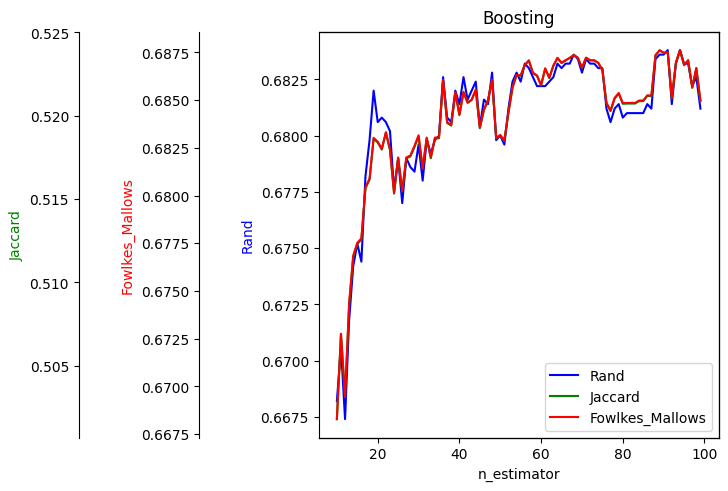

In [69]:
estimate_n_estimators('Boosting', AdaBoostClassifier)

10/100
20/100
30/100
40/100
50/100
60/100
70/100
80/100
90/100


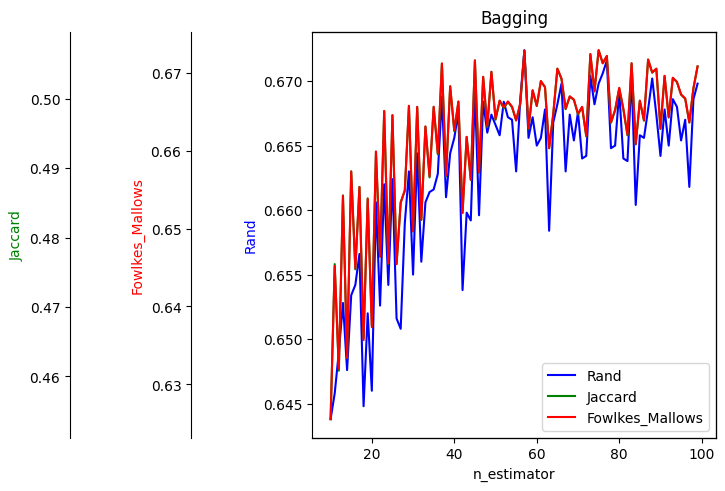

In [70]:
estimate_n_estimators('Bagging', BaggingClassifier)

10/100
20/100
30/100
40/100
50/100
60/100
70/100
80/100
90/100


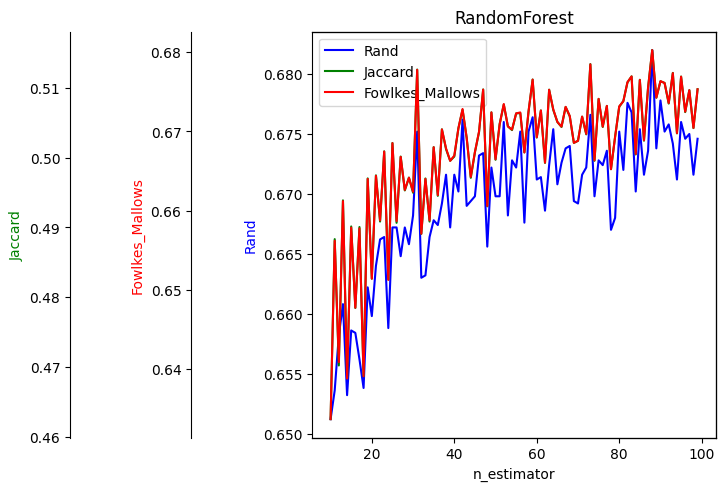

In [75]:
estimate_n_estimators('RandomForest', RandomForestClassifier)

# Вывод
Исходя из результатов классификации при различных количествах оценщиков, следует, что все три способа классификации справились с задачей на примерно одном и том же уровне.

Оценки:

Rand
Boosting - 68.5%
Bagging - 67.5%
RandomForest - 68.5%


Jaccard
Boosting - 52.5%
Bagging - 52%
RandomForest - 51.5%


Fowlkes Mallows
Boosting - 68.75%
Bagging - 67%
RandomForest - 68%


Так же максимальные показатели точности были получены у всех методов при использовании около 90 оценщиков.
